<a href="https://colab.research.google.com/github/poojamahajan0712/s9/blob/master/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from PIL import Image

#from transform_func import transform1
from data_load_cifar10 import dataload
from util import *
import resnet
from train import train
from test2 import test
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
from aug__new_albumv2 import album_train,album_test
from utils import *
from gradcam import GradCAM



  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-2qjb7g1t
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-2qjb7g1t
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=70eb47a6a7b0eab2b41f1c3027915fc2ed7349b94e773c3062f2152c111a7174
  Stored in directory: /tmp/pip-ephem-wheel-cache-ykw58pju/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [2]:

    
trainloader,testloader,classes =dataload(train_transform=album_train(),test_transorm=album_test())


Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck   cat   dog   cat


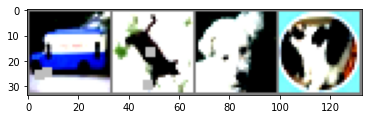

In [3]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4],padding=1))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [4]:

device = which_device()
net = resnet.ResNet18().to(device)
show_model_summary(net, device, (3,32,32))




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

 **Define a Loss function and optimizer** 


**Training and Testing**





In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
def run():
  test_losses=[]
  test_accs=[]
  for epoch in range(55):
      print("EPOCH:", epoch+1)
      train(net, device, trainloader, criterion, optimizer, epoch)
      test(net, device, testloader, criterion, classes, test_losses, test_accs)
  

run()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3712141513824463 Batch_id=390 Accuracy=43.49: 100%|██████████| 391/391 [00:31<00:00, 13.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0099, Accuracy: 5386/10000 (53.86%)

EPOCH: 2


Loss=1.1437056064605713 Batch_id=390 Accuracy=60.76: 100%|██████████| 391/391 [00:32<00:00, 12.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 6400/10000 (64.00%)

EPOCH: 3


Loss=1.0189123153686523 Batch_id=390 Accuracy=68.94: 100%|██████████| 391/391 [00:31<00:00, 12.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 6741/10000 (67.41%)

EPOCH: 4


Loss=0.493400901556015 Batch_id=390 Accuracy=74.30: 100%|██████████| 391/391 [00:31<00:00, 14.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 7238/10000 (72.38%)

EPOCH: 5


Loss=0.7742968797683716 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:31<00:00, 12.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 7360/10000 (73.60%)

EPOCH: 6


Loss=0.5416702032089233 Batch_id=390 Accuracy=81.19: 100%|██████████| 391/391 [00:31<00:00, 14.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7432/10000 (74.32%)

EPOCH: 7


Loss=0.7168197631835938 Batch_id=390 Accuracy=83.87: 100%|██████████| 391/391 [00:32<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 7681/10000 (76.81%)

EPOCH: 8


Loss=0.5067678093910217 Batch_id=390 Accuracy=86.31: 100%|██████████| 391/391 [00:32<00:00, 14.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7798/10000 (77.98%)

EPOCH: 9


Loss=0.3724880814552307 Batch_id=390 Accuracy=88.63: 100%|██████████| 391/391 [00:31<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7827/10000 (78.27%)

EPOCH: 10


Loss=0.3270415663719177 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:31<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 7817/10000 (78.17%)

EPOCH: 11


Loss=0.17308564484119415 Batch_id=390 Accuracy=91.44: 100%|██████████| 391/391 [00:32<00:00, 13.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 7894/10000 (78.94%)

EPOCH: 12


Loss=0.25858524441719055 Batch_id=390 Accuracy=92.92: 100%|██████████| 391/391 [00:32<00:00, 12.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7731/10000 (77.31%)

EPOCH: 13


Loss=0.39249178767204285 Batch_id=390 Accuracy=93.92: 100%|██████████| 391/391 [00:32<00:00, 13.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 7668/10000 (76.68%)

EPOCH: 14


Loss=0.1352728009223938 Batch_id=390 Accuracy=95.03: 100%|██████████| 391/391 [00:32<00:00, 12.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 7935/10000 (79.35%)

EPOCH: 15


Loss=0.18976330757141113 Batch_id=390 Accuracy=95.74: 100%|██████████| 391/391 [00:32<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 7677/10000 (76.77%)

EPOCH: 16


Loss=0.08567465096712112 Batch_id=390 Accuracy=96.31: 100%|██████████| 391/391 [00:32<00:00, 13.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 8036/10000 (80.36%)

EPOCH: 17


Loss=0.1258687824010849 Batch_id=390 Accuracy=97.07: 100%|██████████| 391/391 [00:32<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7976/10000 (79.76%)

EPOCH: 18


Loss=0.05414527654647827 Batch_id=390 Accuracy=97.42: 100%|██████████| 391/391 [00:32<00:00, 12.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0057, Accuracy: 8058/10000 (80.58%)

EPOCH: 19


Loss=0.04956301301717758 Batch_id=390 Accuracy=97.41: 100%|██████████| 391/391 [00:32<00:00, 13.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 8003/10000 (80.03%)

EPOCH: 20


Loss=0.04683966189622879 Batch_id=390 Accuracy=97.88: 100%|██████████| 391/391 [00:32<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 8099/10000 (80.99%)

EPOCH: 21


Loss=0.053132884204387665 Batch_id=390 Accuracy=98.33: 100%|██████████| 391/391 [00:32<00:00, 13.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 8097/10000 (80.97%)

EPOCH: 22


Loss=0.012154984287917614 Batch_id=390 Accuracy=98.54: 100%|██████████| 391/391 [00:32<00:00, 12.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 8043/10000 (80.43%)

EPOCH: 23


Loss=0.058966416865587234 Batch_id=390 Accuracy=98.65: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8056/10000 (80.56%)

EPOCH: 24


Loss=0.03383960947394371 Batch_id=390 Accuracy=98.74: 100%|██████████| 391/391 [00:32<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 8145/10000 (81.45%)

EPOCH: 25


Loss=0.045029815286397934 Batch_id=390 Accuracy=98.77: 100%|██████████| 391/391 [00:32<00:00, 12.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 8139/10000 (81.39%)

EPOCH: 26


Loss=0.07624101638793945 Batch_id=390 Accuracy=98.91: 100%|██████████| 391/391 [00:32<00:00, 12.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 8152/10000 (81.52%)

EPOCH: 27


Loss=0.03815578669309616 Batch_id=390 Accuracy=99.04: 100%|██████████| 391/391 [00:32<00:00, 13.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 7960/10000 (79.60%)

EPOCH: 28


Loss=0.010603154078125954 Batch_id=390 Accuracy=99.06: 100%|██████████| 391/391 [00:32<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 8213/10000 (82.13%)

EPOCH: 29


Loss=0.0342617891728878 Batch_id=390 Accuracy=99.06: 100%|██████████| 391/391 [00:32<00:00, 13.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 8123/10000 (81.23%)

EPOCH: 30


Loss=0.05432368442416191 Batch_id=390 Accuracy=99.20: 100%|██████████| 391/391 [00:32<00:00, 12.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 8202/10000 (82.02%)

EPOCH: 31


Loss=0.046387843787670135 Batch_id=390 Accuracy=99.25: 100%|██████████| 391/391 [00:32<00:00, 14.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 8175/10000 (81.75%)

EPOCH: 32


Loss=0.005014622118324041 Batch_id=390 Accuracy=99.29: 100%|██████████| 391/391 [00:32<00:00, 13.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 8190/10000 (81.90%)

EPOCH: 33


Loss=0.0053466795943677425 Batch_id=390 Accuracy=99.32: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8169/10000 (81.69%)

EPOCH: 34


Loss=0.022007474675774574 Batch_id=390 Accuracy=99.36: 100%|██████████| 391/391 [00:32<00:00, 12.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 8245/10000 (82.45%)

EPOCH: 35


Loss=0.029648596420884132 Batch_id=390 Accuracy=99.30: 100%|██████████| 391/391 [00:32<00:00, 14.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 8197/10000 (81.97%)

EPOCH: 36


Loss=0.031636130064725876 Batch_id=390 Accuracy=99.42: 100%|██████████| 391/391 [00:32<00:00, 13.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 8279/10000 (82.79%)

EPOCH: 37


Loss=0.008877831511199474 Batch_id=390 Accuracy=99.41: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 8227/10000 (82.27%)

EPOCH: 38


Loss=0.014300244860351086 Batch_id=390 Accuracy=99.51: 100%|██████████| 391/391 [00:32<00:00, 13.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 8271/10000 (82.71%)

EPOCH: 39


Loss=0.008862996473908424 Batch_id=390 Accuracy=99.45: 100%|██████████| 391/391 [00:32<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 8213/10000 (82.13%)

EPOCH: 40


Loss=0.02276729978621006 Batch_id=390 Accuracy=99.47: 100%|██████████| 391/391 [00:32<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8240/10000 (82.40%)

EPOCH: 41


Loss=0.06416263431310654 Batch_id=390 Accuracy=99.57: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 8277/10000 (82.77%)

EPOCH: 42


Loss=0.00668942928314209 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 8152/10000 (81.52%)

EPOCH: 43


Loss=0.008293134160339832 Batch_id=390 Accuracy=99.53: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8202/10000 (82.02%)

EPOCH: 44


Loss=0.043757177889347076 Batch_id=390 Accuracy=99.50: 100%|██████████| 391/391 [00:32<00:00, 14.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8202/10000 (82.02%)

EPOCH: 45


Loss=0.017457306385040283 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [00:32<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 8294/10000 (82.94%)

EPOCH: 46


Loss=0.01915411278605461 Batch_id=390 Accuracy=99.63: 100%|██████████| 391/391 [00:32<00:00, 13.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 8302/10000 (83.02%)

EPOCH: 47


Loss=0.0017371237045153975 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [00:32<00:00, 14.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8249/10000 (82.49%)

EPOCH: 48


Loss=0.0014407038688659668 Batch_id=390 Accuracy=99.66: 100%|██████████| 391/391 [00:32<00:00, 13.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8227/10000 (82.27%)

EPOCH: 49


Loss=0.0039031386841088533 Batch_id=390 Accuracy=99.71: 100%|██████████| 391/391 [00:32<00:00, 13.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8260/10000 (82.60%)

EPOCH: 50


Loss=0.019381314516067505 Batch_id=390 Accuracy=99.75: 100%|██████████| 391/391 [00:32<00:00, 12.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8290/10000 (82.90%)

EPOCH: 51


Loss=0.0021868585608899593 Batch_id=390 Accuracy=99.77: 100%|██████████| 391/391 [00:32<00:00, 12.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8294/10000 (82.94%)

EPOCH: 52


Loss=0.005931669380515814 Batch_id=390 Accuracy=99.78: 100%|██████████| 391/391 [00:31<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 8342/10000 (83.42%)

EPOCH: 53


Loss=0.0015952229732647538 Batch_id=390 Accuracy=99.75: 100%|██████████| 391/391 [00:31<00:00, 13.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 8307/10000 (83.07%)

EPOCH: 54


Loss=0.0027947784401476383 Batch_id=390 Accuracy=99.77: 100%|██████████| 391/391 [00:32<00:00, 12.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 8359/10000 (83.59%)

EPOCH: 55


Loss=0.06548610329627991 Batch_id=390 Accuracy=99.70: 100%|██████████| 391/391 [00:31<00:00, 12.23it/s]


Test set: Average loss: 0.0064, Accuracy: 8264/10000 (82.64%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  horse  frog   car  ship


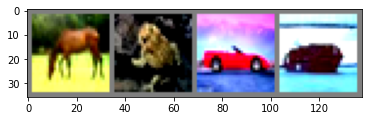

In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [51]:
model_dict = dict(type='resnet', arch=net, layer_name='layer4', input_size=(32,32))
gradcam = GradCAM(model_dict)
# get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
p=images[:1]
#print(p.shape)

torch_img = torch.from_numpy(np.asarray(p)).permute(0, 3, 1, 2).reshape(3, 32, 32).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)

normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
normed_img = normalizer(torch_img)

#print(type(normed_img))

# get a GradCAM saliency map on the class index 10.
mask, logit = gradcam(normed_img, class_idx=1)

# make heatmap from mask and synthesize saliency map using heatmap and img
heatmap, cam_result = visualize_cam(mask, torch_img)

torch.Size([1, 3, 32, 32])
<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


TypeError: ignored

Okay, now let us see what the neural network thinks these examples above are:
The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:


In [0]:
images=images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.

